In [1]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import mixture
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from statsmodels.tools import add_constant
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, RationalQuadratic, DotProduct
import statsmodels.api as sm
sns.set(style="ticks")
import random
import tensorflow as tf
from matplotlib import pyplot as plt
import GPflow
import george
george.__version__
from george import kernels
%matplotlib inline

/Users/kaelanelson/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# pm = pd.read_csv("fin_pmweather.csv")
pm = pd.read_csv("finished_US.csv")

In [3]:
pm

,Parameter Name,Site_keys,ppm,forest,open_land,water,wetland,saltwater/sandybeach,recreational,marina,...,mining,waste,crop_land,cemetary,golfcourse,high_density_residential,medium_density_residential,low_density_residential,industrial,not_assigned
0,Suspended particulate (TSP),[ 30.555472 -87.713599],51.745098,0.000000,0.0,0.000000,0.00,0.0,0,0,...,0,0,0.200000,0,0,0,0.430000,0,0.000000,0.0
1,Suspended particulate (TSP),[ 31.891272 -85.13521 ],52.418605,0.130000,0.0,0.460000,0.00,0.0,0,0,...,0,0,0.000000,0,0,0,0.160000,0,0.000000,0.0
2,Suspended particulate (TSP),[ 33.949542 -86.473042],51.500000,0.010000,0.0,0.000000,0.00,0.0,0,0,...,0,0,0.000000,0,0,0,0.280000,0,0.000000,0.0
3,Suspended particulate (TSP),[ 33.656771 -85.824409],80.179487,0.000000,0.0,0.000000,0.00,0.0,0,0,...,0,0,0.000000,0,0,0,0.529101,0,0.132275,0.0
4,Suspended particulate (TSP),[ 33.685659 -85.837744],59.172662,0.000000,0.0,0.000000,0.00,0.0,0,0,...,0,0,0.376543,0,0,0,0.617284,0,0.006173,0.0
5,Suspended particulate (TSP),[ 32.83957 -86.628871],92.320000,0.060000,0.0,0.000000,0.00,0.0,0,0,...,0,0,0.020000,0,0,0,0.320000,0,0.000000,0.0
6,Suspended particulate (TSP),[ 32.209311 -88.051961],74.659574,0.625000,0.0,0.000000,0.00,0.0,0,0,...,0,0,0.331250,0,0,0,0.000000,0,0.000000,0.0
7,Suspended particulate (TSP),[ 34.720368 -87.819755],42.098039,0.310000,0.0,0.000000,0.00,0.0,0,0,...,0,0,0.690000,0,0,0,0.000000,0,0.000000,0.0
8,Suspended particulate (TSP),[ 34.761756 -87.639195],70.250000,0.230769,0.0,0.000000,0.00,0.0,0,0,...,0,0,0.721154,0,0,0,0.019231,0,0.028846,0.0
9,Suspended particulate (TSP),[ 34.716757 -87.881701],45.600000,0.000000,0.0,0.000000,0.00,0.0,0,0,...,0,0,1.000000,0,0,0,0.000000,0,0.000000,0.0


In [4]:
#takes out features columns
x = pm.iloc[:, 3:]


#scale predictors to "look like" standard normals
scaled = preprocessing.minmax_scale(x)
x_scaled = pd.DataFrame(scaled)

#reassign correct column names
cols = list(x.columns)
x_scaled.columns = cols

#takes of what we want to predict
target = pm.iloc[:, 2]
target = 100*target

x_train, x_test, y_train, y_test = train_test_split(x_scaled, target, test_size=0.30, random_state=0)

#add random noise
noise = np.abs(np.random.normal(0, 1, len(x_train)))


In [5]:
#C(0.91, (0.70, 1.12))
#length scale is sd of y_train, constant term captures the entire range of y_train plus some more so that amplitude of kernel
# will capture most/all of y-values
#C(0.05, (3.05e-07, 0.12))
#C(1, (0.001, 10))*
# kernel = RBF(length_scale = 1)
# kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1)
kernel = RationalQuadratic(length_scale=1.0, alpha=0.1)
# kernel = C(0.1, (0.01, 10.0))* (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.0, 10.0)) ** 2)
# kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),nu=1.5)
# kernel = WhiteKernel(noise_level=1)

# gp = GaussianProcessRegressor(kernel=kernel, alpha = noise, n_restarts_optimizer=9)
gp = GaussianProcessRegressor(alpha = .0000001, copy_X_train=False,kernel=kernel,n_restarts_optimizer=5, normalize_y=False,optimizer='fmin_l_bfgs_b', random_state=None)
gp.fit(x_train, y_train)

y_train_pred, sigma_train = gp.predict(x_train, return_std=True)
y_test_pred, sigma_test = gp.predict(x_test, return_std=True)

#get R^2
r2 = gp.score(x_train, y_train)
r2_t = gp.score(x_test, y_test)

#get MSE measurements
MSE_test = np.mean((y_test_pred - y_test)**2)
MSE_train = np.mean((y_train_pred - y_train)**2)

#get log likelihood
t=gp.log_marginal_likelihood()

#calculate AIC
AIC = 2*len(x_test.columns) - 2*np.log(-t)
print(r2, r2_t)

/Users/kaelanelson/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


(0.488101807408233, -1.2792266751051811)


In [12]:
"""Not good - for a finite number of gaussian models, and we are looking for an infinite number"""
gp2 = sk.mixture.GaussianMixture(n_components = 2)
gp2.fit(x_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [13]:
gp2.score(x_train)

78.399465515234951

In [14]:
gp2.predict_proba(x_train)

array([[  1.00000000e+00,   3.11321003e-12],
       [  1.00000000e+00,   1.68297474e-11],
       [  0.00000000e+00,   1.00000000e+00],
       ..., 
       [  1.00000000e+00,   3.10804494e-13],
       [  1.00000000e+00,   4.24713423e-15],
       [  1.00000000e+00,   1.42314106e-12]])

In [15]:
"""Gaussian Regression with GPflow"""
#http://gpflow.readthedocs.io/en/latest/notebooks/regression.html
# kernel = GPflow.kernels.RBF(1)
kernel = GPflow.kernels.Matern32(1) + GPflow.kernels.Linear(1)

#it seems like trying kernels dont make a difference
m = GPflow.gpr.GPR(x_train.values, y_train.values.reshape(1364,1), kern=kernel)

In [16]:
m.compute_log_likelihood()

-10031446670.049131

In [17]:
m.likelihood.variance
m

Name,values,prior,constraint
name.kern.linear.variance,[ 1.],None,+ve
name.kern.matern32.lengthscales,[ 1.],None,+ve
name.kern.matern32.variance,[ 1.],None,+ve
name.likelihood.variance,[ 1.],None,+ve


In [18]:
mean, var = m.predict_y(x_test.values)

In [19]:
mean, var

(array([[ 5124.78461638],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4622.30429652],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 5110.87037096],
        [ 4403.61142273],
        [ 4622.30429652],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.18086258],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4369.17956921],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 4403.61142273],
        [ 44

In [20]:
m

Name,values,prior,constraint
name.kern.linear.variance,[ 1.],None,+ve
name.kern.matern32.lengthscales,[ 1.],None,+ve
name.kern.matern32.variance,[ 1.],None,+ve
name.likelihood.variance,[ 1.],None,+ve


In [21]:
m.optimize()

      fun: 13200.189300578084
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -0.00000000e+00,  -8.84433102e-16,  -1.19356454e-06,
        -3.87553181e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 60
      nit: 59
   status: 0
  success: True
        x: array([   -66631.38883957,    285027.80432435,   2662300.04648968,
        13671134.31560135])

In [22]:
m

Name,values,prior,constraint
name.kern.linear.variance,[ 1.00000000e-06],None,+ve
name.kern.matern32.lengthscales,[ 285027.80432535],None,+ve
name.kern.matern32.variance,[ 2662300.04649068],None,+ve
name.likelihood.variance,[ 13671134.31560235],None,+ve


In [23]:
m.compute_log_likelihood()

-13200.189300578084

In [26]:
"""You can incorporate priors like this"""
m.kern.linear.variance.prior = GPflow.priors.Gamma(1., 1.)

In [27]:
m

Name,values,prior,constraint
name.kern.linear.variance,[ 1.00000000e-06],"Ga([ 1.],[ 1.])",+ve
name.kern.matern32.lengthscales,[ 285027.80432535],None,+ve
name.kern.matern32.variance,[ 2662300.04649068],None,+ve
name.likelihood.variance,[ 13671134.31560235],None,+ve


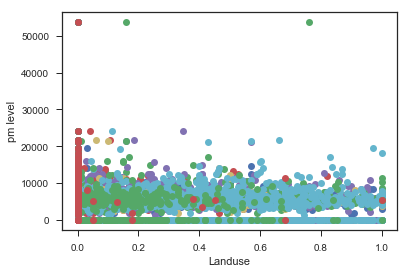

In [28]:
"""Gaussian Processes with George"""
#http://dan.iel.fm/george/dev/tutorials/model/
plt.plot(x_train.values, y_train.values, "o")
plt.xlabel("Landuse")
plt.ylabel("pm level")
plt.show()

In [29]:
x_train.shape

(1364, 21)

In [30]:
"""Create Kernel"""
kernel = np.var(y_train.values) * kernels.ExpSquaredKernel(0.5, ndim=21)
gp = george.GP(kernel)
yerr = 0.2 * np.ones_like(y_train)
gp.compute(x_train, yerr)

In [31]:
"""Prediction of y test variables"""
pred, pred_var = gp.predict(y_train, x_train, return_var=True)

'Original Data\nplt.plot(x_train.values, y_train.values, "o")\nplt.xlabel("Landuse")\nplt.ylabel("pm level")\nplt.show()'

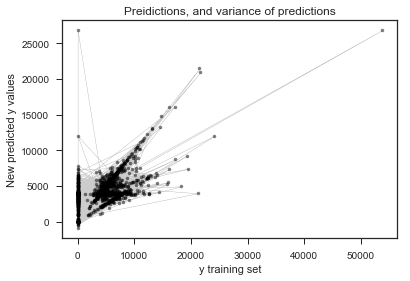

In [32]:
"""Prediction Plot"""
plt.fill_between(y_train, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
plt.plot(y_train, pred, '.', color="k", lw=1.5, alpha=0.5)
plt.xlabel("y training set")
plt.ylabel("New predicted y values")
plt.title("Preidictions, and variance of predictions")
#scatter plot wouldnt work on the above plot

"""Original Data
plt.plot(x_train.values, y_train.values, "o")
plt.xlabel("Landuse")
plt.ylabel("pm level")
plt.show()"""

In [33]:
print("Initial ln-likelihood: {0:.2f}".format(gp.lnlikelihood(y_train)))

Initial ln-likelihood: -160305001031.86


In [34]:
"""You can incorporate priors like this
model = george.GP(mean=PolynomialModel(m=0, b=0, amp=-1, loc=0.1, ln_sig2=np.log(0.4)), fit_mean=True)
model.compute(x_train, yerr)"""

'You can incorporate priors like this\nmodel = george.GP(mean=PolynomialModel(m=0, b=0, amp=-1, loc=0.1, ln_sig2=np.log(0.4)), fit_mean=True)\nmodel.compute(x_train, yerr)'

In [60]:
"""Reading CO2 hourly Data for 6/19 in Boston"""
df = pd.read_csv("boston_06_19_CO.csv")

In [61]:
times = []
time = df["Sample Collection Start Time"]
for i in range(len(time)):
    times.append(float(time[i][:2]))

In [66]:
#This could cause an error with potentially assigning a copy
df['Sample Collection Start Time'] = times

In [67]:
"""Splitting into train and test data"""
train, test = train_test_split(df, test_size=.30, random_state=0)
x_train = train["Sample Collection Start Time"]
y_train = train["Measure Value"]
x_test = test["Sample Collection Start Time"]
y_test = test["Measure Value"]

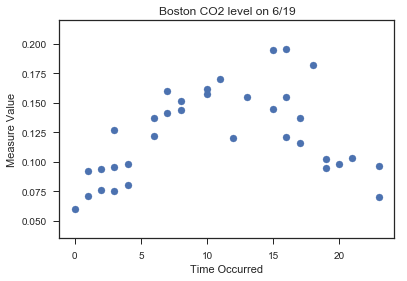

In [71]:
"""Plotting level of CO2 with respect to time for x train and y train"""
plt.scatter(x_train, y_train)
plt.ylabel("Measure Value")
plt.xlabel("Time Occurred")
plt.title("Boston CO2 level on 6/19")

In [76]:
len(x_train)

35

In [72]:
"""Simple Gaussian"""
kern = RBF(length_scale = 1)
gp = GaussianProcessRegressor(copy_X_train=False,kernel=kern,n_restarts_optimizer=1, normalize_y=False,optimizer='fmin_l_bfgs_b', random_state=None)
gp.fit(x_train, y_train)

y_train_pred, sigma_train = gp.predict(x_train, return_std=True)
y_test_pred, sigma_test = gp.predict(x_test, return_std=True)

#get R^2
r2 = gp.score(x_train, y_train)
r2_t = gp.score(x_test, y_test)

#get MSE measurements
MSE_test = np.mean((y_test_pred - y_test)**2)
MSE_train = np.mean((y_train_pred - y_train)**2)

#get log likelihood
t=gp.log_marginal_likelihood()

#calculate AIC
AIC = 2*len(x_test.columns) - 2*np.log(-t)
print(r2, r2_t)

/Users/kaelanelson/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 35]

In [75]:
len(y_train)

35